In [2]:
# 실습용 데이터 관련 패키지
import torch
from torchvision.datasets import KMNIST

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

# 기계학습 모델 패키지
from sklearn.neural_network import MLPClassifier

# 데이터 시각화 패키지
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정

# 예측 평가 지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix

# 예측 결과 시각화 custom 함수
def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black",fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 기타
import warnings, itertools, time
warnings.filterwarnings(action='ignore')

# 데이터 저장

In [4]:
# KMNIST 데이터를 저장할 directory
download_root = './'

# 데이터 scaling을 위한 요소
kmnist_transform = transforms.Compose([
    transforms.ToTensor(), # 데이터 형태를 Pytorch에 적합한 형태로 바꾸어 줌
    transforms.Normalize((0.0,), (1.0,)) # feature들의 평균과 표준편차를 0과 1로 scaling 해줌
])

#FashionMNIST 훈련 데이터셋 다운로드
dataset = KMNIST(download_root, transform=kmnist_transform, train=True, download=True)

# 훈련 데이터셋을 60000개(학습용) / 10000개(검증용)으로 분리
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [50000, 10000])

# 테스트 데이터셋 다운로드
test_dataset = KMNIST(download_root, transform=kmnist_transform, train=False, download=True)

# 모델구축
### 히든레이어(300, 150)
### activation="relu"
### learning_rate_init=0.001, learning_rate='constant'
- early_stopping=True, n_iter_no_change=5
- solver='adam',batch_size=100solver='adam',batch_size=100

In [5]:
model = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="relu",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.001,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)

# 모델 학습

In [6]:
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 2.46856991
Validation score: 0.811900
Iteration 2, loss = 0.53939934
Validation score: 0.861000
Iteration 3, loss = 0.35378653
Validation score: 0.897200
Iteration 4, loss = 0.27548213
Validation score: 0.903300
Iteration 5, loss = 0.22491469
Validation score: 0.912000
Iteration 6, loss = 0.19618124
Validation score: 0.917100
Iteration 7, loss = 0.17656048
Validation score: 0.922700
Iteration 8, loss = 0.15631938
Validation score: 0.923600
Iteration 9, loss = 0.14210629
Validation score: 0.931300
Iteration 10, loss = 0.12666851
Validation score: 0.941300
Iteration 11, loss = 0.12700055
Validation score: 0.928400
Iteration 12, loss = 0.12412983
Validation score: 0.937000
Iteration 13, loss = 0.11864681
Validation score: 0.943400
Iteration 14, loss = 0.09593659
Validation score: 0.946800
Iteration 15, loss = 0.09216485
Validation score: 0.950300
Iteration 16, loss = 0.09744432
Validation score: 0.944300
Iteration 17, loss = 0.09109354
Validation score: 0.950600
Iterat

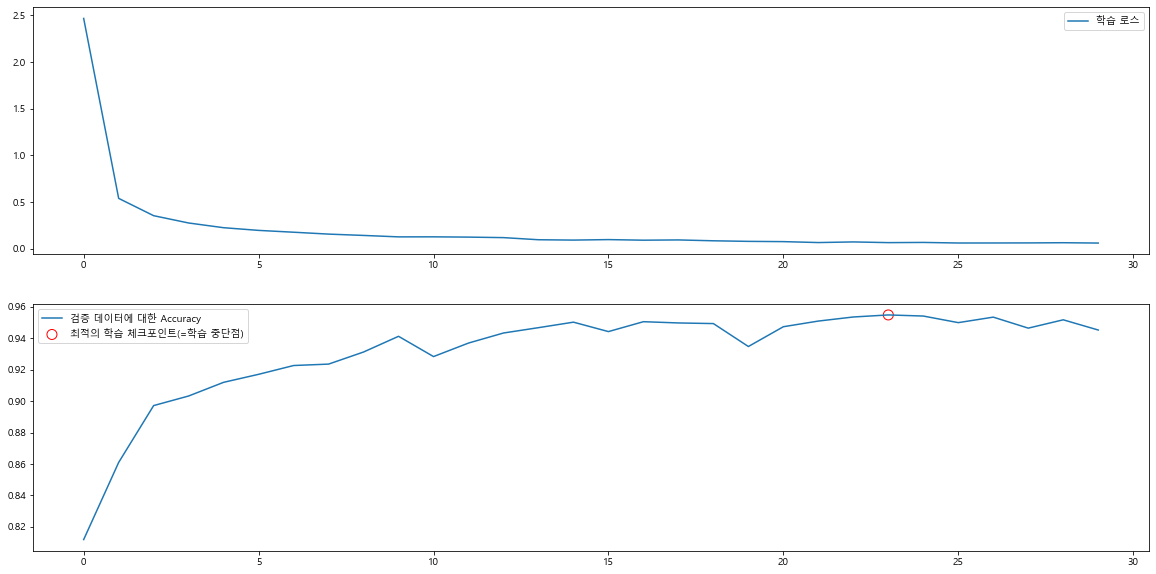

In [7]:
# 모델의 training loss
train_loss = model.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

In [8]:
# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

훈련 데이터셋 정확도: 0.981  |  테스트용 데이터셋 정확도: 0.891


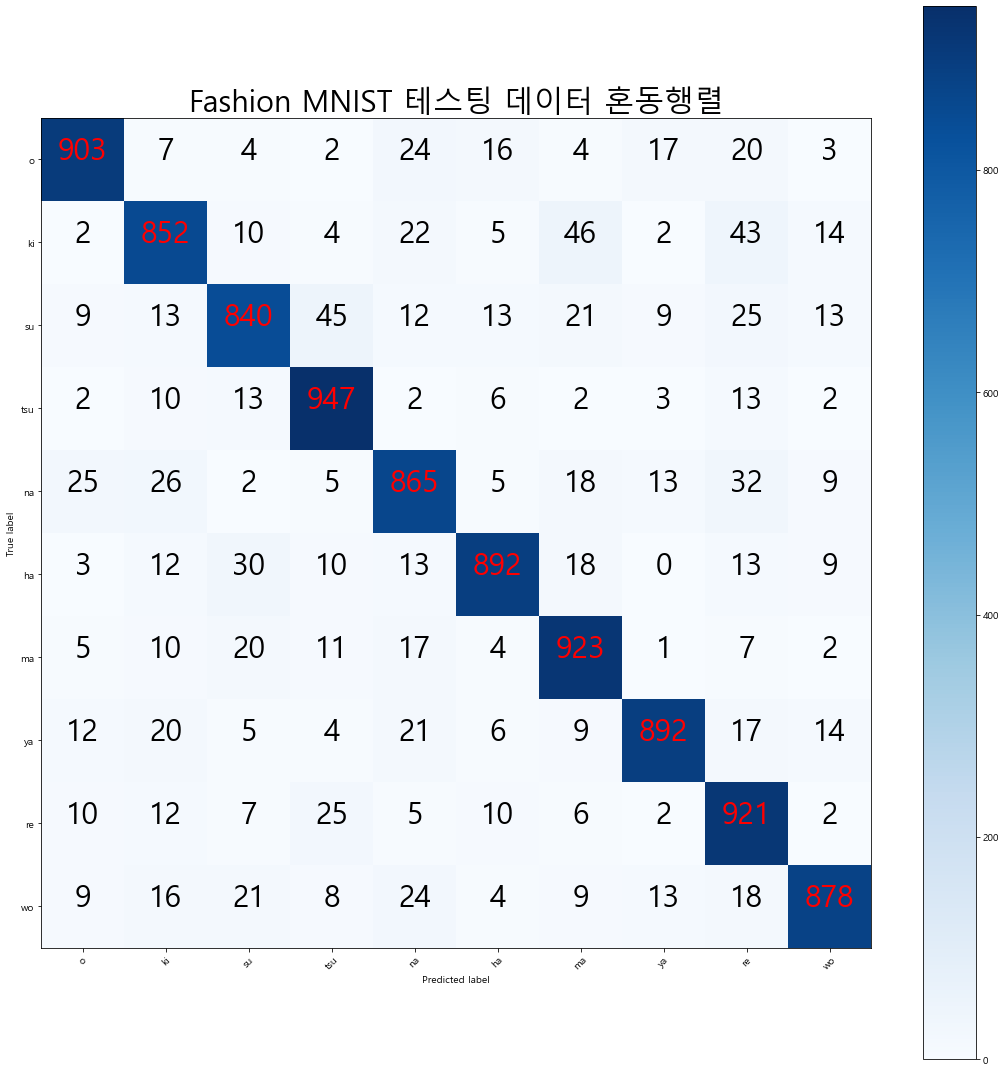

In [9]:
confusion_matrix_ = confusion_matrix(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
plot_confusion_matrix(cm = confusion_matrix_, classes=dataset.classes,title='Fashion MNIST 테스팅 데이터 혼동행렬')

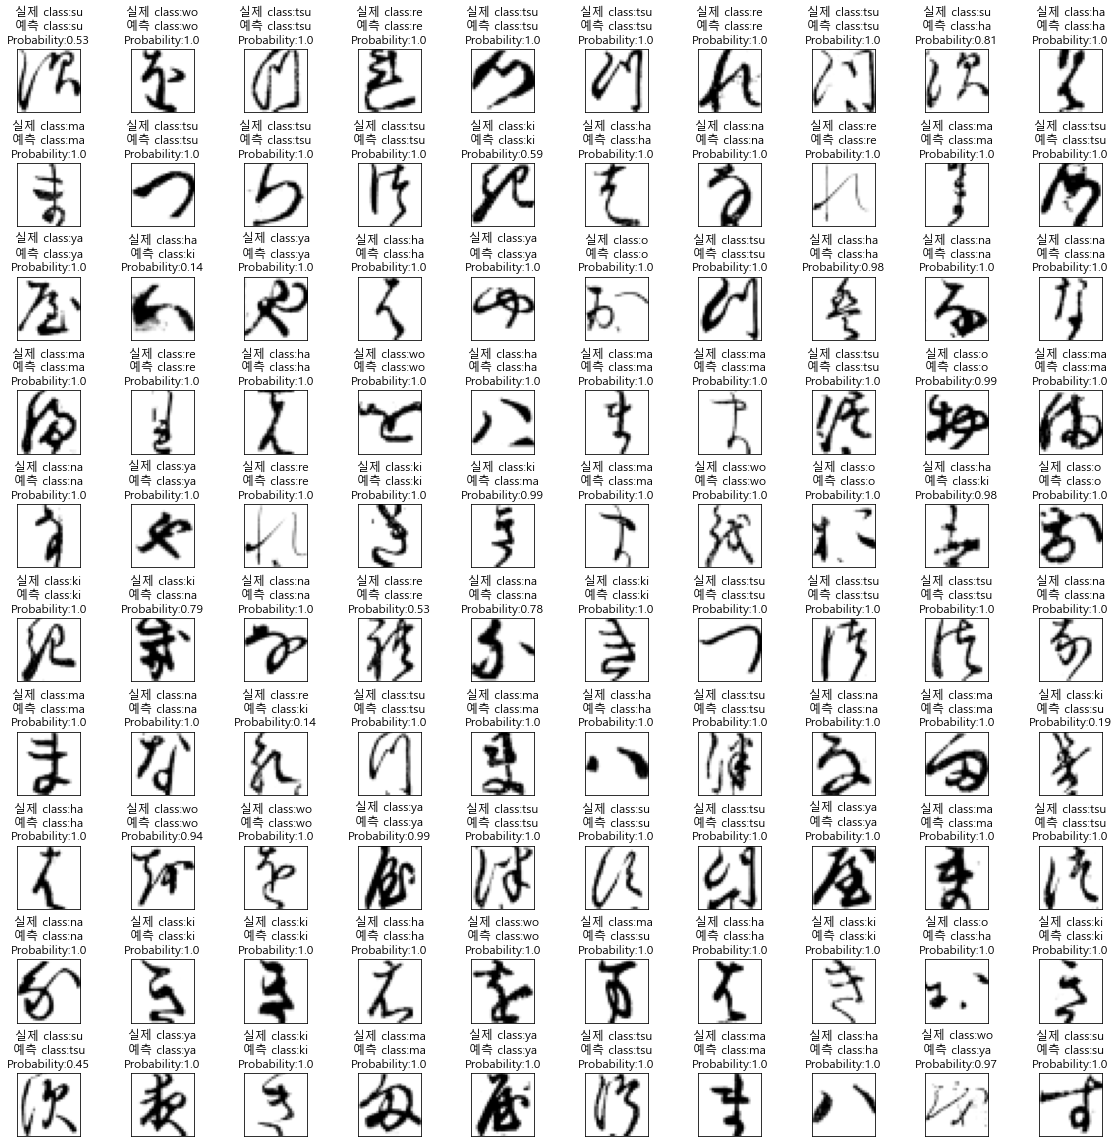

In [10]:
for_visualization_test_x = test_dataset.data.numpy()[:100]
for_visualization_test_y = test_dataset.targets.numpy()[:100]

f ,axs = plt.subplots(10,10,figsize=(20,20))
plt.subplots_adjust(hspace=0.8)
for i in range(10):
    for j in range(10):
        
        x_data = for_visualization_test_x[10*i+j]
        y_data = for_visualization_test_y[10*i+j]
        real_class = dataset.classes[y_data]
        predicted_class = dataset.classes[np.argmax(model.predict_proba(x_data.reshape(1,-1)))]
        predicted_prob = np.max(model.predict_proba(x_data.reshape(1,-1))).round(2)
        
        # x, y 축의 지점 표시를 안함
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

        # subplot의 제목을 i번째 결과에 해당하는 숫자로 설정
        axs[i,j].set_title(f"실제 class:{real_class}\n예측 class:{predicted_class}\nProbability:{predicted_prob}")

        # 입력으로 사용한 i번째 테스트 이미지를 28x28로 재배열하고
        # 이 2차원 배열을 그레이스케일 이미지로 출력
        axs[i,j].imshow(x_data.reshape((28, 28)),cmap=plt.cm.gray_r)
 
plt.show()

# 모델구축2 learning rate 변경10배
### 히든레이어(300, 150)
### activation="relu"
### learning_rate_init=0.01, learning_rate='constant'
- early_stopping=True, n_iter_no_change=5
- solver='adam',batch_size=100solver='adam',batch_size=100

In [11]:
model2 = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="relu",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.01,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)

In [13]:
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model2.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 2.01185722
Validation score: 0.742500
Iteration 2, loss = 0.81823653
Validation score: 0.759900
Iteration 3, loss = 0.72357591
Validation score: 0.801700
Iteration 4, loss = 0.67049737
Validation score: 0.777700
Iteration 5, loss = 0.66735424
Validation score: 0.806400
Iteration 6, loss = 0.63360121
Validation score: 0.792400
Iteration 7, loss = 0.62161452
Validation score: 0.812200
Iteration 8, loss = 0.72887516
Validation score: 0.763400
Iteration 9, loss = 0.66093495
Validation score: 0.787200
Iteration 10, loss = 0.78220580
Validation score: 0.796400
Iteration 11, loss = 0.79551902
Validation score: 0.787700
Iteration 12, loss = 0.77926505
Validation score: 0.748600
Iteration 13, loss = 0.85832774
Validation score: 0.750900
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
time : 112.71861243247986


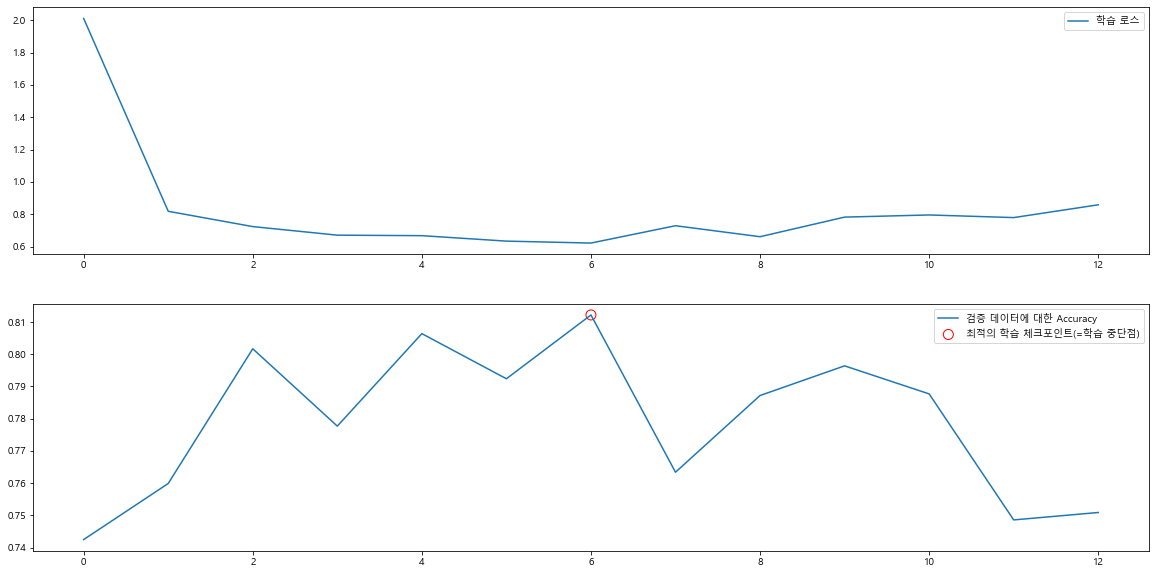

훈련 데이터셋 정확도: 0.822  |  테스트용 데이터셋 정확도: 0.655


In [14]:
# 모델의 training loss
train_loss = model2.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model2.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model2.validation_scores_),np.max(model2.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model2.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model2.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# 모델구축3 learning rate 변경5배
### 히든레이어(300, 150)
### activation="relu"
### learning_rate_init=0.005, learning_rate='constant'
- early_stopping=True, n_iter_no_change=5
- solver='adam',batch_size=100solver='adam',batch_size=100

In [15]:
model3 = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="relu",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.005,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model3.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 1.92902227
Validation score: 0.813100
Iteration 2, loss = 0.57338354
Validation score: 0.853200
Iteration 3, loss = 0.46594750
Validation score: 0.868800
Iteration 4, loss = 0.38913018
Validation score: 0.892500
Iteration 5, loss = 0.35908685
Validation score: 0.896000
Iteration 6, loss = 0.33387376
Validation score: 0.895700
Iteration 7, loss = 0.33321321
Validation score: 0.883000
Iteration 8, loss = 0.31676356
Validation score: 0.905100
Iteration 9, loss = 0.32023292
Validation score: 0.901700
Iteration 10, loss = 0.34831671
Validation score: 0.895000
Iteration 11, loss = 0.35452872
Validation score: 0.884400
Iteration 12, loss = 0.36062019
Validation score: 0.902800
Iteration 13, loss = 0.34627548
Validation score: 0.901700
Iteration 14, loss = 0.34058631
Validation score: 0.895700
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
time : 124.5874330997467


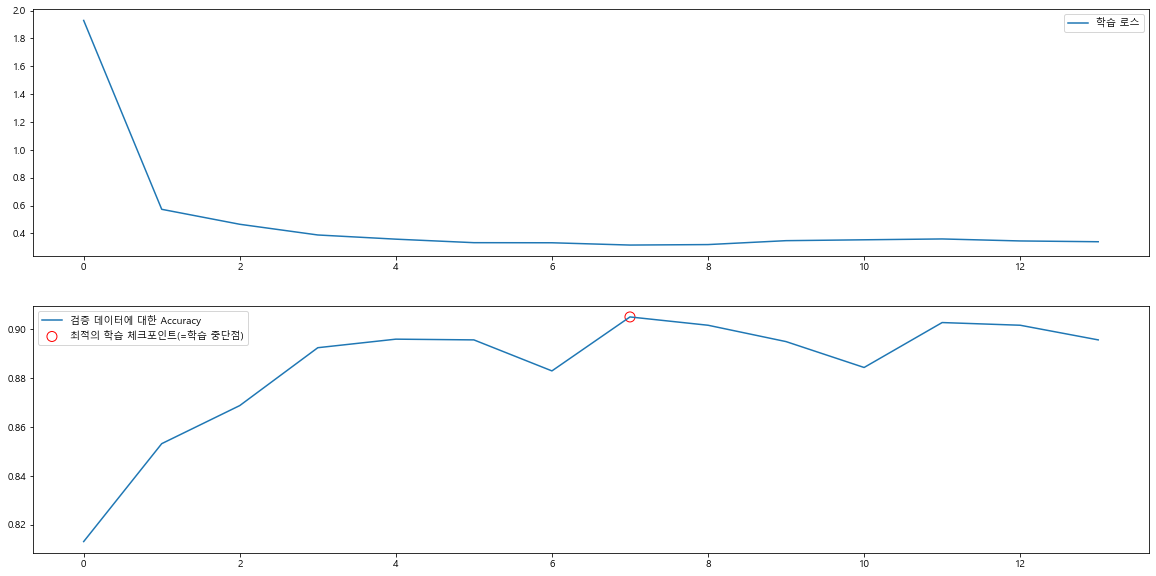

훈련 데이터셋 정확도: 0.921  |  테스트용 데이터셋 정확도: 0.795


In [16]:
# 모델의 training loss
train_loss = model3.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model3.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model3.validation_scores_),np.max(model3.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model3.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model3.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# 모델구축4 learning rate 변경0.5배
### 히든레이어(300, 150)
### activation="relu"
### learning_rate_init=0.005, learning_rate='constant'
- early_stopping=True, n_iter_no_change=5
- solver='adam',batch_size=100solver='adam',batch_size=100

In [17]:
model4 = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="relu",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.0005,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model4.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 3.78794489
Validation score: 0.827000
Iteration 2, loss = 0.84730987
Validation score: 0.855800
Iteration 3, loss = 0.42216746
Validation score: 0.880200
Iteration 4, loss = 0.27167199
Validation score: 0.893900
Iteration 5, loss = 0.19658927
Validation score: 0.903200
Iteration 6, loss = 0.16282968
Validation score: 0.906400
Iteration 7, loss = 0.15504266
Validation score: 0.910700
Iteration 8, loss = 0.14721855
Validation score: 0.908700
Iteration 9, loss = 0.14833298
Validation score: 0.916100
Iteration 10, loss = 0.12127412
Validation score: 0.927000
Iteration 11, loss = 0.11351598
Validation score: 0.919200
Iteration 12, loss = 0.12726255
Validation score: 0.929000
Iteration 13, loss = 0.10764674
Validation score: 0.933200
Iteration 14, loss = 0.08351002
Validation score: 0.932000
Iteration 15, loss = 0.08879678
Validation score: 0.935600
Iteration 16, loss = 0.09547555
Validation score: 0.939800
Iteration 17, loss = 0.07309275
Validation score: 0.947200
Iterat

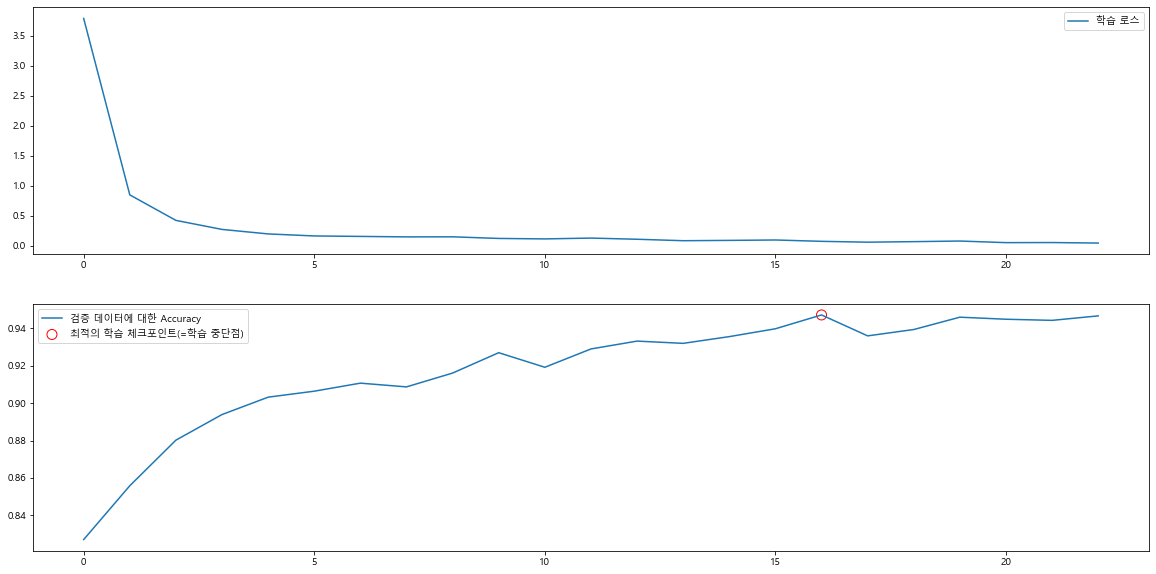

훈련 데이터셋 정확도: 0.979  |  테스트용 데이터셋 정확도: 0.870


In [18]:
# 모델의 training loss
train_loss = model4.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model4.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model4.validation_scores_),np.max(model4.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model4.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model4.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# 모델구축5 활성화함수 'sigmoid'
### 히든레이어(300, 150)
### activation="sigmoid"
### learning_rate_init=0.005, learning_rate='constant'
- early_stopping=True, n_iter_no_change=5
- solver='adam',batch_size=100
ValueError: The activation 'sigmoid' is not supported. Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

In [21]:
model = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="logistic",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.001,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 0.85032509
Validation score: 0.829600
Iteration 2, loss = 0.51761102
Validation score: 0.847700
Iteration 3, loss = 0.46653528
Validation score: 0.853400
Iteration 4, loss = 0.45298394
Validation score: 0.857700
Iteration 5, loss = 0.43345772
Validation score: 0.859500
Iteration 6, loss = 0.41121223
Validation score: 0.875900
Iteration 7, loss = 0.39678399
Validation score: 0.877200
Iteration 8, loss = 0.37825154
Validation score: 0.882900
Iteration 9, loss = 0.37171397
Validation score: 0.876100
Iteration 10, loss = 0.37872907
Validation score: 0.877100
Iteration 11, loss = 0.35954788
Validation score: 0.879600
Iteration 12, loss = 0.35110800
Validation score: 0.891300
Iteration 13, loss = 0.34062874
Validation score: 0.892900
Iteration 14, loss = 0.33101849
Validation score: 0.897600
Iteration 15, loss = 0.32444330
Validation score: 0.891300
Iteration 16, loss = 0.31783903
Validation score: 0.903100
Iteration 17, loss = 0.30525006
Validation score: 0.901600
Iterat

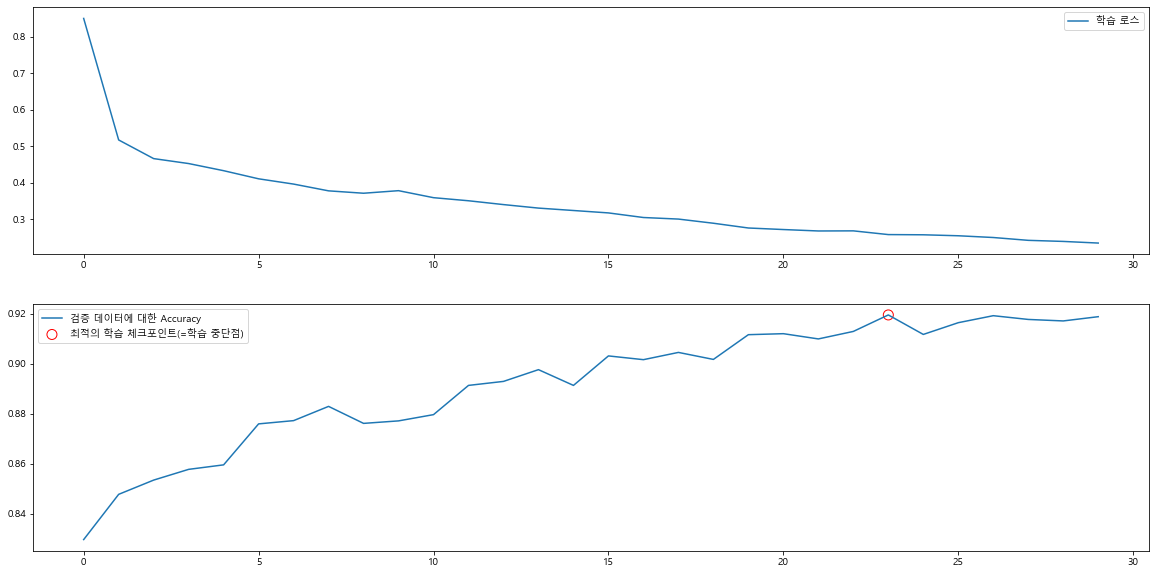

훈련 데이터셋 정확도: 0.923  |  테스트용 데이터셋 정확도: 0.825


In [22]:
# 모델의 training loss
train_loss = model.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# identity

In [23]:
model = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="identity",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.001,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 8.58594928
Validation score: 0.717600
Iteration 2, loss = 6.32756313
Validation score: 0.689500
Iteration 3, loss = 4.95237486
Validation score: 0.670900
Iteration 4, loss = 3.98124766
Validation score: 0.720700
Iteration 5, loss = 2.98629069
Validation score: 0.710100
Iteration 6, loss = 2.29600804
Validation score: 0.735300
Iteration 7, loss = 1.78826733
Validation score: 0.717200
Iteration 8, loss = 1.39976564
Validation score: 0.729700
Iteration 9, loss = 1.18390049
Validation score: 0.738400
Iteration 10, loss = 1.04505231
Validation score: 0.755100
Iteration 11, loss = 1.00839404
Validation score: 0.759300
Iteration 12, loss = 1.01059800
Validation score: 0.745300
Iteration 13, loss = 1.01783695
Validation score: 0.750100
Iteration 14, loss = 1.10864307
Validation score: 0.726700
Iteration 15, loss = 0.98190307
Validation score: 0.754900
Iteration 16, loss = 0.97127167
Validation score: 0.736600
Iteration 17, loss = 0.95027060
Validation score: 0.748800
Valida

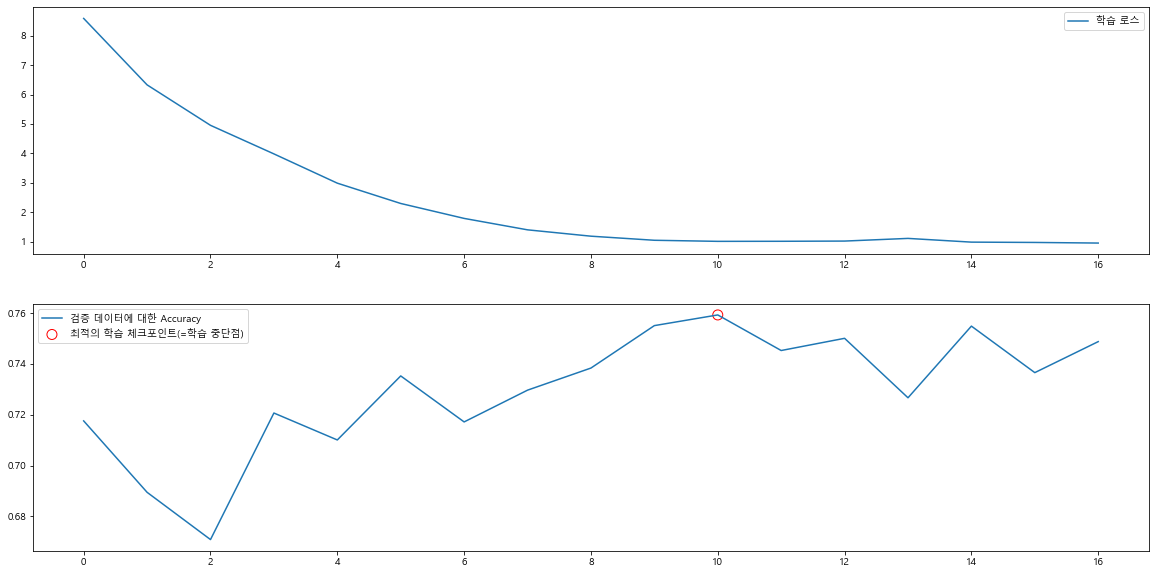

훈련 데이터셋 정확도: 0.772  |  테스트용 데이터셋 정확도: 0.634


In [24]:
# 모델의 training loss
train_loss = model.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# softmax

In [27]:
model = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="softmax",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.001,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

KeyError: 'softmax'

ValueError: attempt to get argmax of an empty sequence

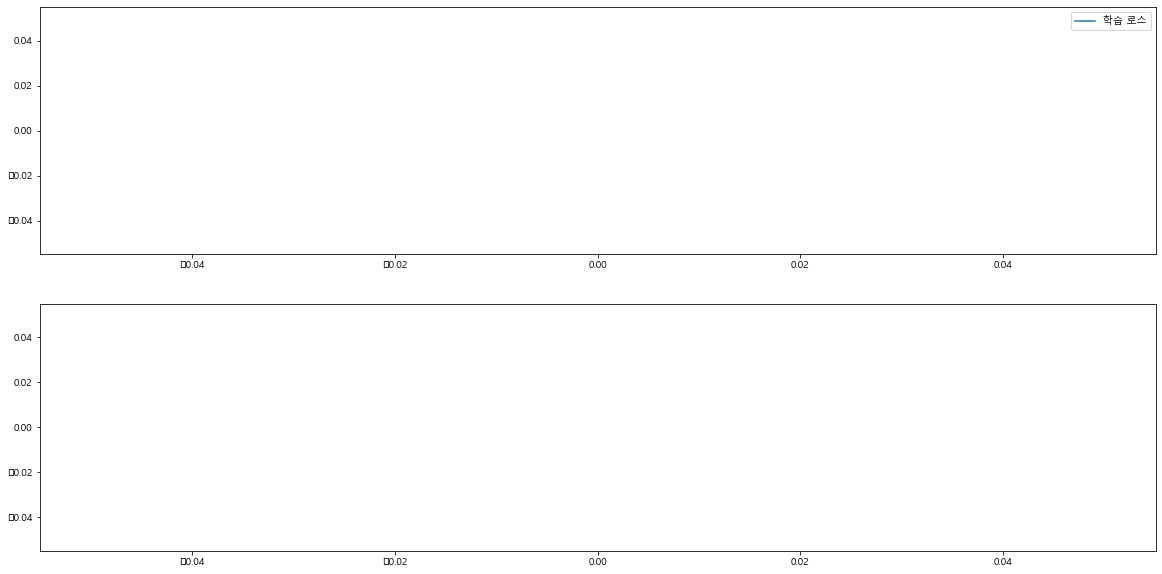

In [26]:
# 모델의 training loss
train_loss = model.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 

# tanh

In [28]:
model = MLPClassifier(random_state=0,hidden_layer_sizes=(300,150),activation="tanh",solver='adam',
                     batch_size=100,learning_rate='constant',learning_rate_init=0.001,verbose=True,early_stopping=True,
                     validation_fraction=10000/60000, n_iter_no_change=5)
start = time.time()  # 모델 학습 시작 시간 저장 28*28=784
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) # 모델 학습
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Iteration 1, loss = 0.75893942
Validation score: 0.814700
Iteration 2, loss = 0.55979075
Validation score: 0.821300
Iteration 3, loss = 0.51327738
Validation score: 0.847200
Iteration 4, loss = 0.47059101
Validation score: 0.849200
Iteration 5, loss = 0.44709037
Validation score: 0.870700
Iteration 6, loss = 0.42190810
Validation score: 0.870600
Iteration 7, loss = 0.40845815
Validation score: 0.869200
Iteration 8, loss = 0.40310472
Validation score: 0.879000
Iteration 9, loss = 0.38062708
Validation score: 0.874800
Iteration 10, loss = 0.37579373
Validation score: 0.881700
Iteration 11, loss = 0.36335958
Validation score: 0.884100
Iteration 12, loss = 0.34952246
Validation score: 0.893100
Iteration 13, loss = 0.34240836
Validation score: 0.889200
Iteration 14, loss = 0.33815938
Validation score: 0.897700
Iteration 15, loss = 0.32777619
Validation score: 0.898700
Iteration 16, loss = 0.31579659
Validation score: 0.902500
Iteration 17, loss = 0.31651088
Validation score: 0.895000
Iterat

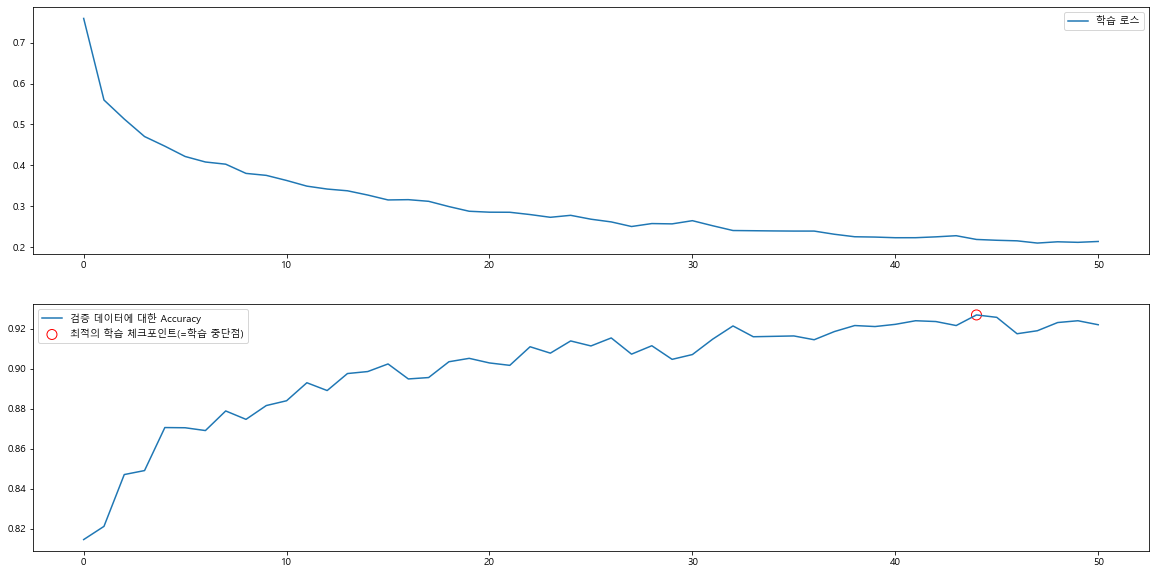

훈련 데이터셋 정확도: 0.936  |  테스트용 데이터셋 정확도: 0.832


In [29]:
# 모델의 training loss
train_loss = model.loss_curve_

# 그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습로스 변동 관찰하기
axs[0].plot(train_loss,label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),s=100,facecolors='none',edgecolors='r',
              label='최적의 학습 체크포인트(=학습 중단점)')
axs[1].legend()
plt.show()

# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}",f"테스트용 데이터셋 정확도: {test_accuracy:.3f}",sep='  |  ') 